In [59]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import pickle

In [53]:
Categories=['lumos','revelio','leviosa']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='./dataset_labeled/' 
#path which contains all the categories of images
for i in Categories:
    
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        #img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_array.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data 
y=df.iloc[:,-1] #output data



loading... category : lumos
loaded category:lumos successfully
loading... category : revelio
loaded category:revelio successfully
loading... category : leviosa
loaded category:leviosa successfully


In [54]:
param_grid={'C':[0.1,1,10,100],'gamma':[0.0001,0.001,0.1,1],'kernel':['rbf','poly']}
svc=svm.SVC(probability=True)
model=GridSearchCV(svc,param_grid)

In [55]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)
print('Splitted Successfully')
model.fit(x_train,y_train)
print('The Model is trained well with the given images')
# model.best_params_ contains the best parameters obtained from GridSearchCV

Splitted Successfully
The Model is trained well with the given images


In [56]:
y_pred=model.predict(x_test)
print("The predicted Data is :")
print(y_pred)
print("The actual data is:")
print(np.array(y_test))
print(f"The model is {accuracy_score(y_pred,y_test)*100}% accurate")

The predicted Data is :
[0 2 1 2 1 1 0 0 0 2 2 1 1 2 0 1 0 0 2 2 2 1 0 1 2 1 1 1 2 1 2 0 0 1 1 1 2
 1 0 1 1 2 0 2 1 0 0 0 2 2 1 1 2 0 2 2 0 2 2 1]
The actual data is:
[0 2 1 2 1 1 0 0 0 2 2 1 1 2 0 1 0 0 2 2 2 0 0 1 2 1 1 1 2 1 2 0 0 1 1 2 2
 1 0 1 1 0 0 2 1 0 0 0 2 2 1 1 0 0 2 2 0 2 2 1]
The model is 93.33333333333333% accurate


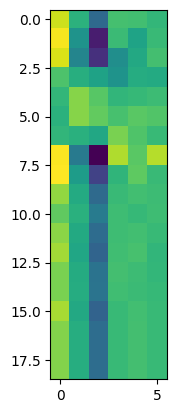

In [57]:

testing_path = './test/'

testImage = imread(os.path.join(testing_path,'lumos2.jpeg'))
plt.imshow(testImage)
plt.show()

l=[testImage.flatten()]


In [58]:
probability=model.predict_proba(l)


for ind,val in enumerate(Categories):
    print(f'{val} = {probability[0][ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])


lumos = 97.68259309543332%
revelio = 1.5928672448132082%
leviosa = 0.724539659753487%
The predicted image is : lumos


In [60]:
#Save and load model
# save model
pickle.dump(model, open("svm.pickle", "wb"))

# load model
loaded_model = pickle.load(open("svm.pickle", "rb"))